In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('ecommerce.csv')
df.head(3)


,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.0,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.0,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.0,240.75,Credit Card,Mobile,7,8,True,5,2


In [15]:
df.drop(columns=['Order_ID','Customer_ID','Delivery_Time_Days'],axis=1,inplace=True)

In [16]:
df.head()

,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Customer_Rating
0,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,5
1,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3
2,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,2
3,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,4
4,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,4


In [17]:
df.isnull().any().sum()

np.int64(0)

In [18]:
df.isnull().sum()

Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Customer_Rating             0
dtype: int64

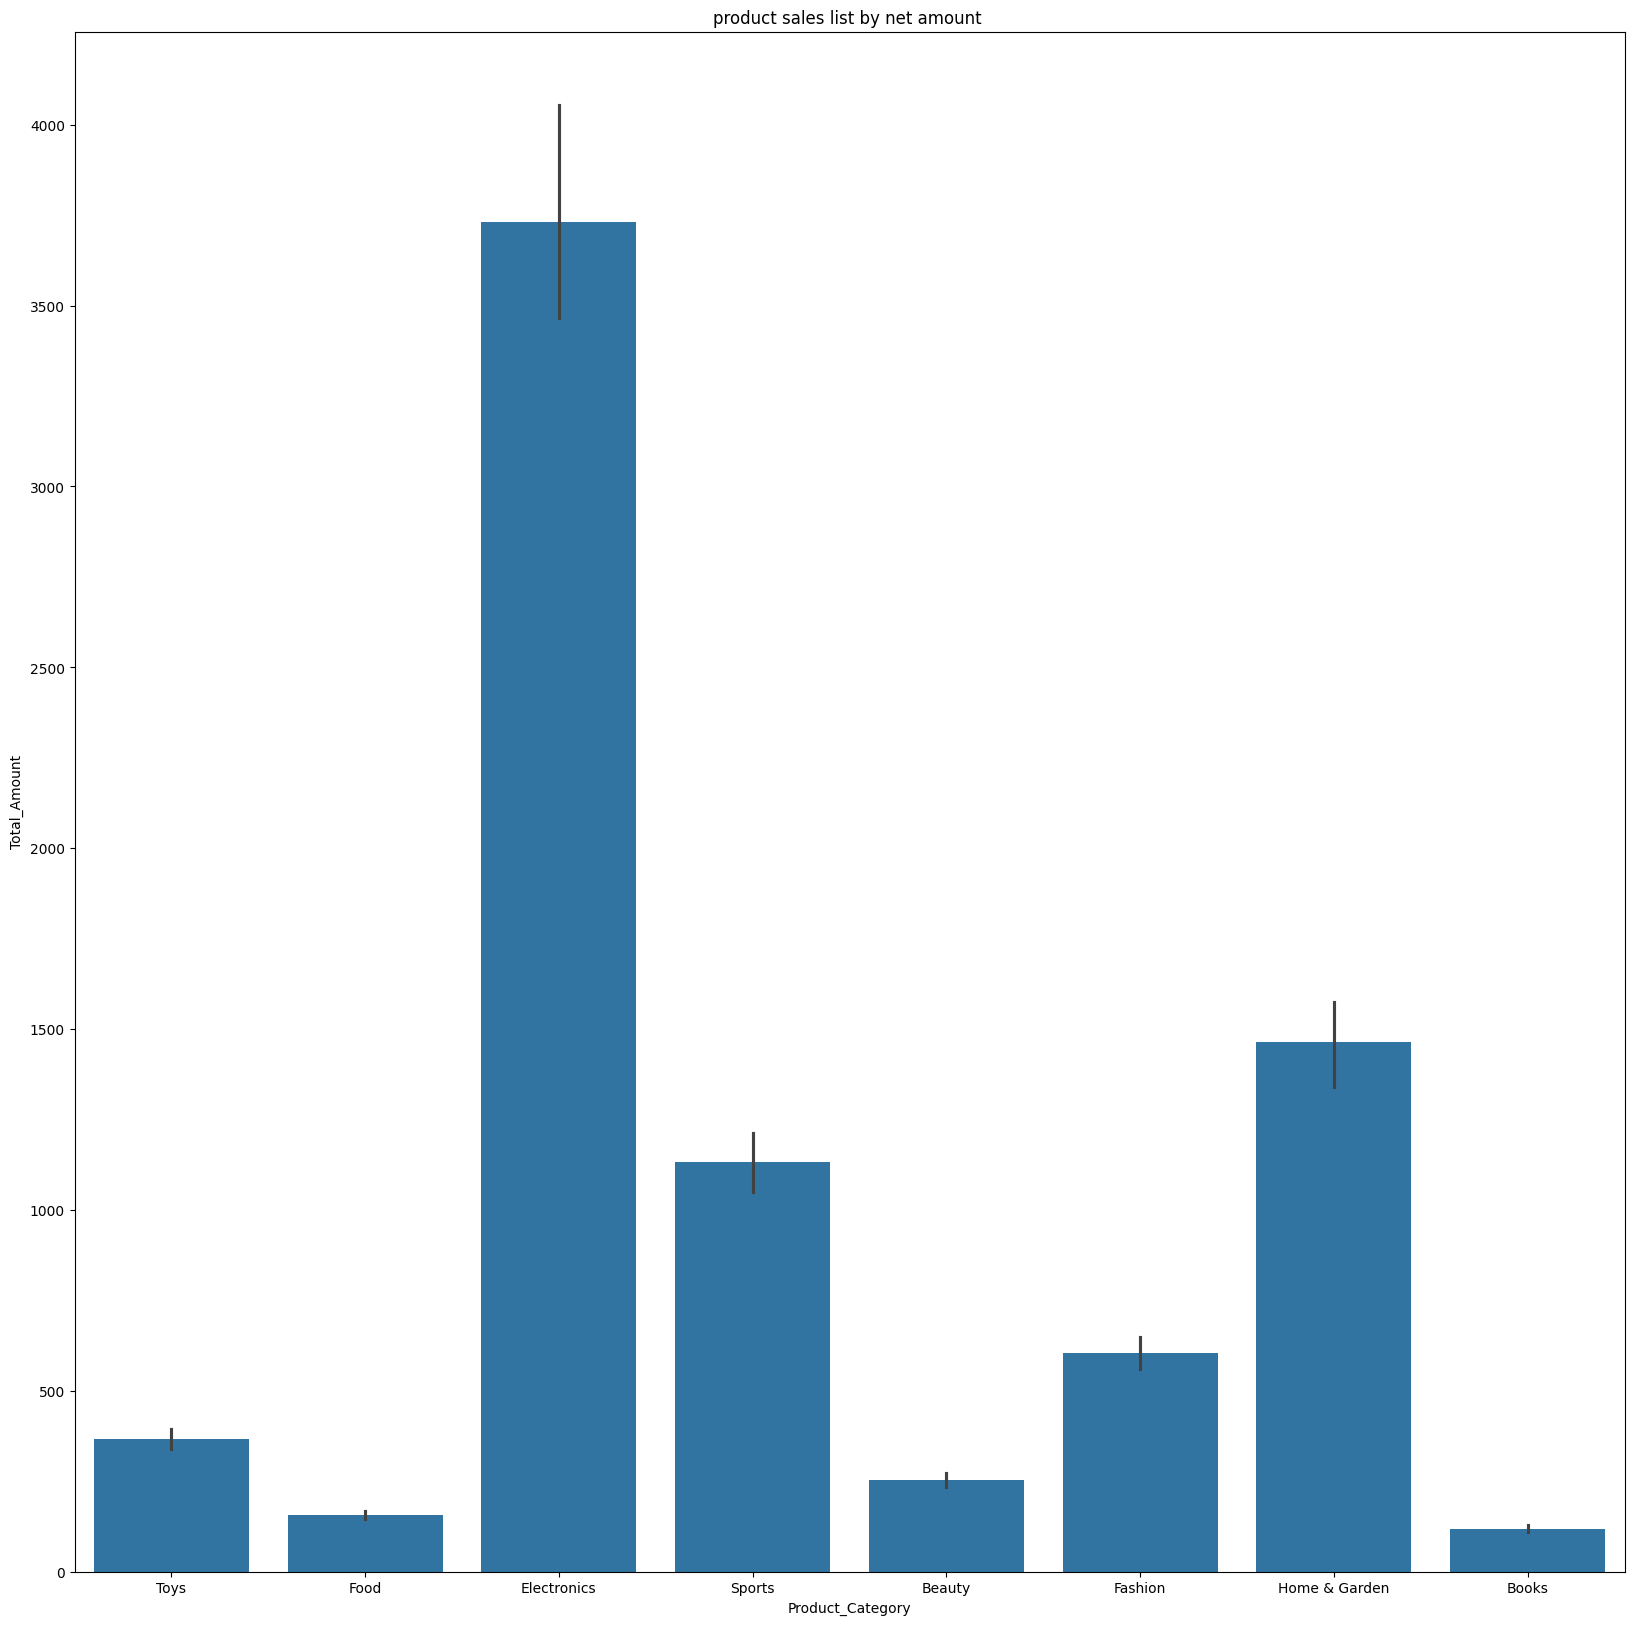

In [19]:
import matplotlib.pyplot as plt,seaborn as sns
plt.figure(figsize=(20,20))
sns.barplot(x='Product_Category',y='Total_Amount',data=df)
plt.title('product sales list by net amount ')
plt.show()

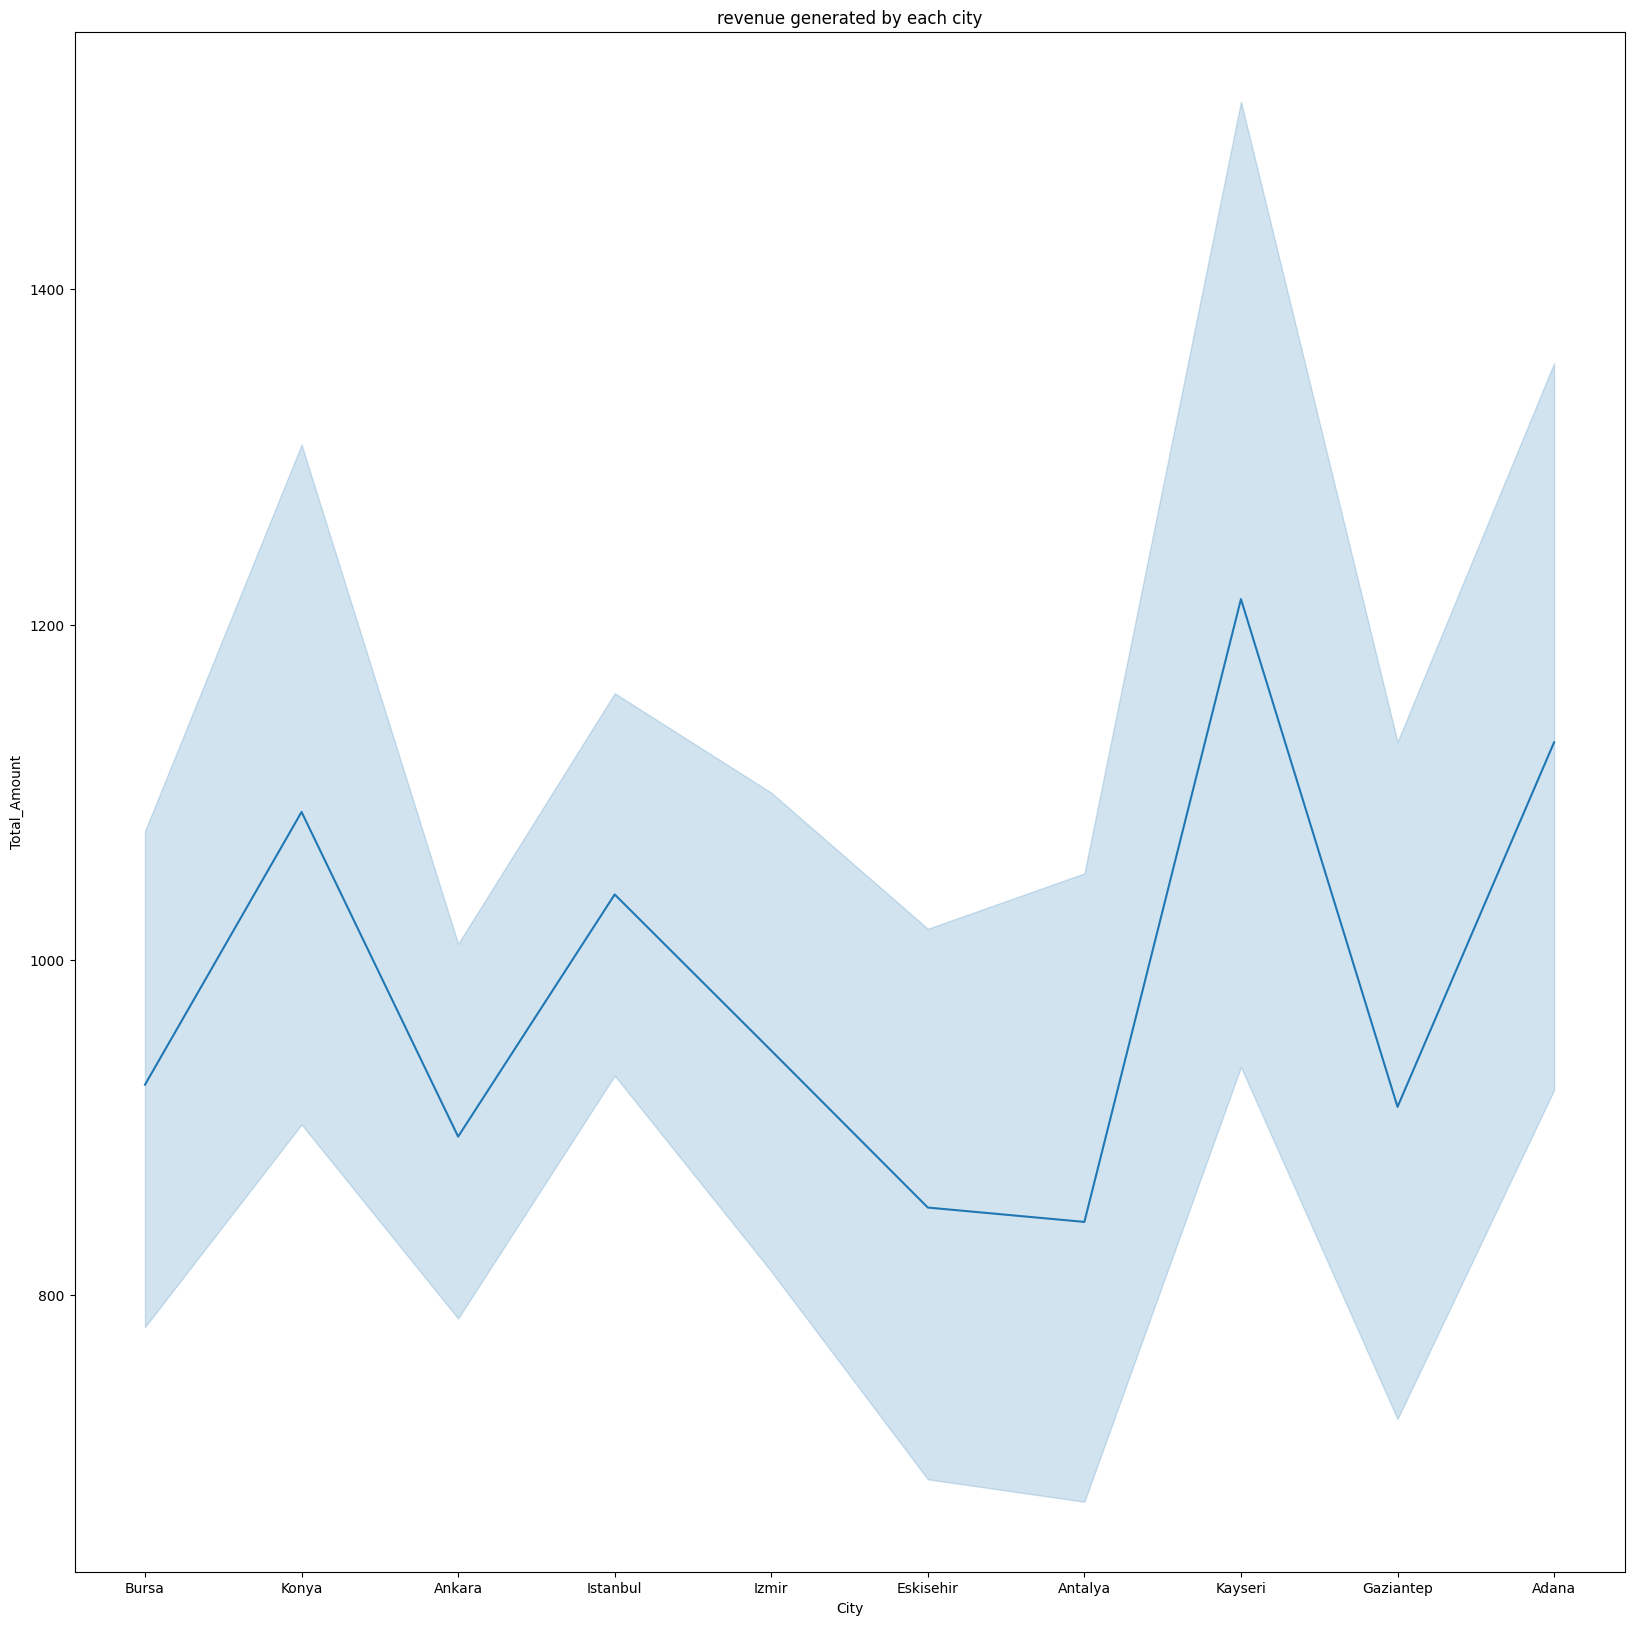

In [18]:
plt.figure(figsize=(20,20))
sns.lineplot(x='City',y='Total_Amount',data=df)
plt.title('revenue generated by each city')
plt.show()

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a date column
data = pd.read_csv('ecommerce.csv')

# First, make sure your date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract month as number (1-12)
data['month'] = data['Date'].dt.month 
data.to_csv('ecommerce.csv', index=False)



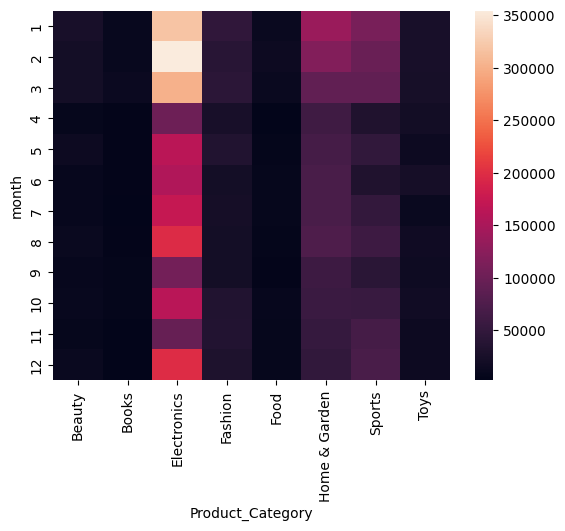

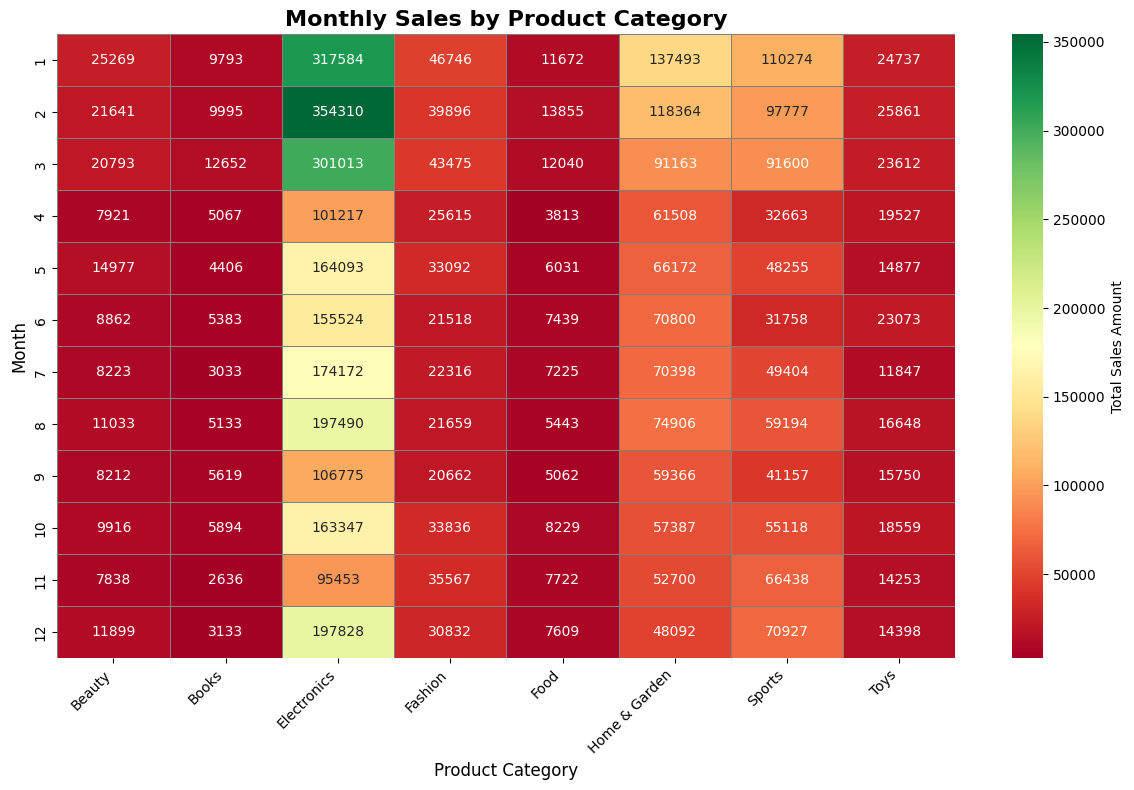

In [40]:

 ### Load your own CSV file
data = pd.read_csv('ecommerce.csv')

# Create pivot table with aggregation
data = data.pivot_table(index="month",columns="Product_Category",values="Total_Amount",aggfunc='sum')
sns.heatmap(data)
plt.figure(figsize=(12, 8))  # Larger figure for better readability

sns.heatmap(
    data, 
    annot=True,           # Show numbers in cells
    fmt='.0f',            # Format numbers without decimals
    cmap='RdYlGn',        # Red-Yellow-Green color scheme (or try 'coolwarm', 'viridis')
    linewidths=0.5,       # Add gridlines between cells
    linecolor='gray',     # Gridline color
    cbar_kws={'label': 'Total Sales Amount'}  # Label for color bar
)

plt.title('Monthly Sales by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate category names for readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()